__Project Title:
<br>University Admission Prediction Using Multiple
Linear Regression
<br>Code by Abhijit Mahajan.__

# TASK 1: 
__UNDERSTAND THE PROBLEMS STATMENT__                              

# TASK 2:
__IMPORT LIBRARIES AND DATASET__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [2]:
admission_df=pd.read_csv("Admission_Predict.csv")

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.drop('Serial No.',axis=1,inplace=True)

In [5]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# TASK 3: 
__PERFORM EXPLORATORY DATA ANALYSIS__

In [6]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df_university=admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


# TASK 4:
__PERFORM DATA VISUALIZATION__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001490D1D9508>,
      dtype=object)

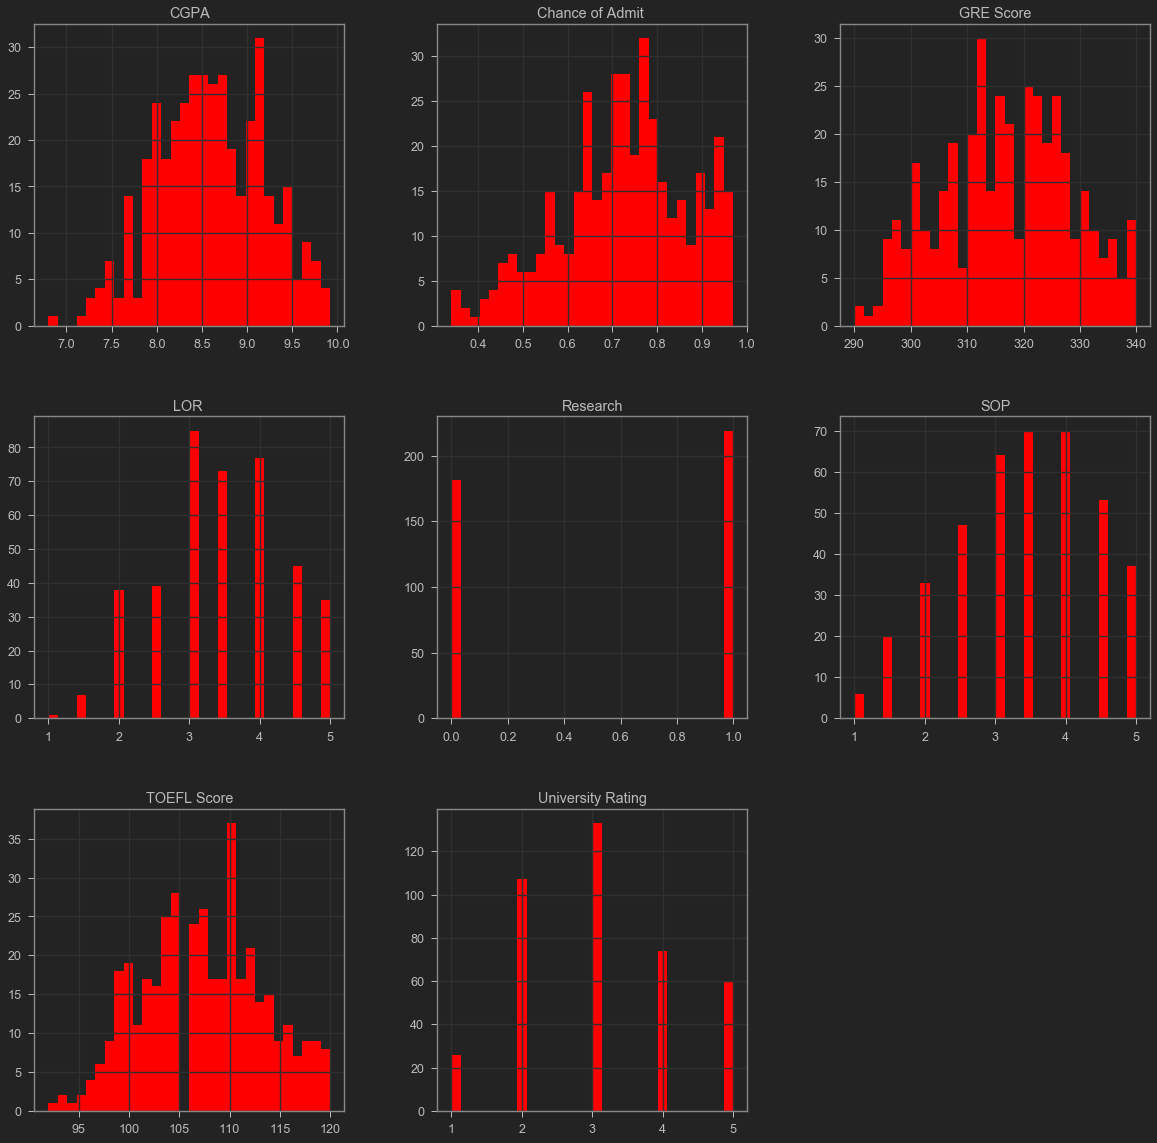

In [10]:
admission_df.hist(bins=30,figsize=(20,20),color='red')

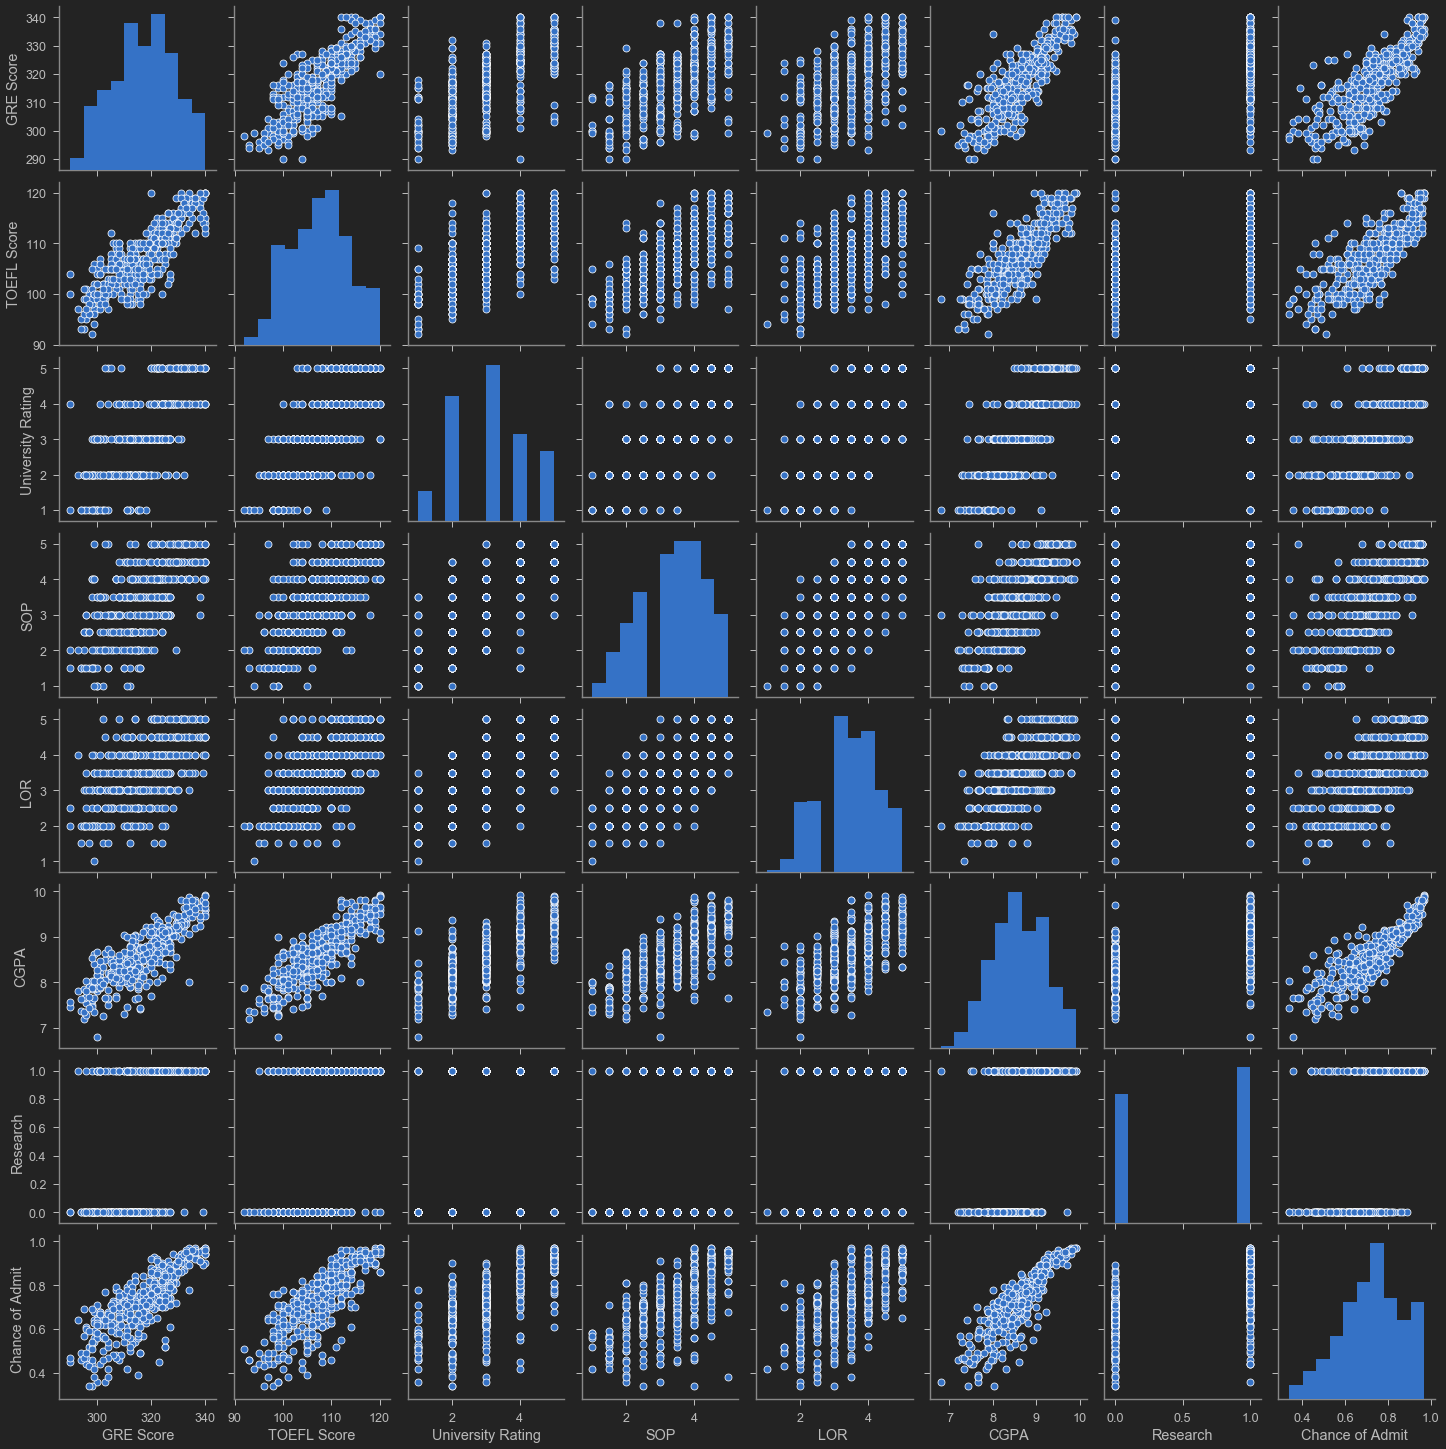

In [11]:
sns.pairplot(admission_df)

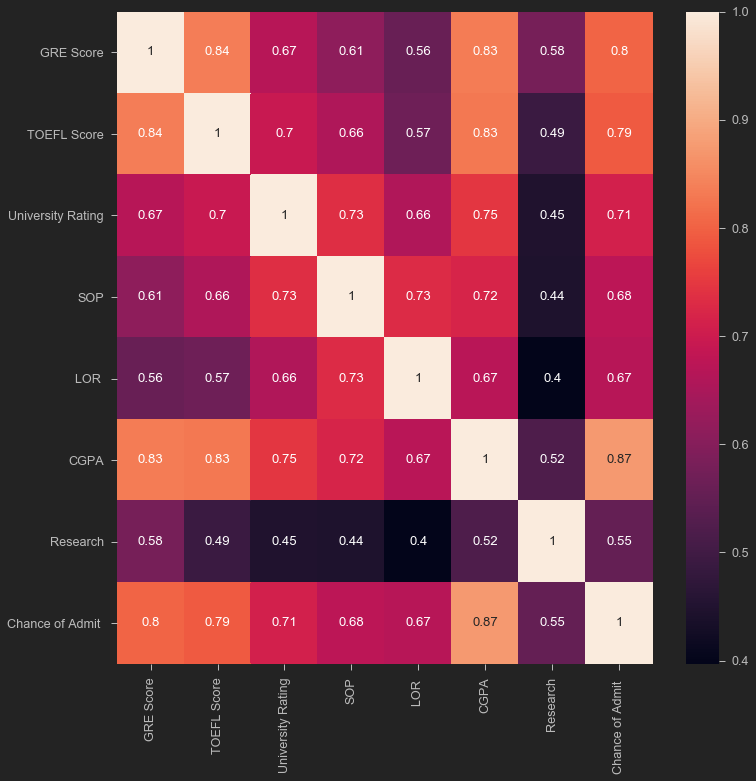

In [12]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()


# TASK 5:
__CREATE TRAINING AND TESTING DATASET__

In [13]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
x=admission_df.drop(columns=['Chance of Admit '])

In [15]:
y=admission_df['Chance of Admit ']

In [16]:
x=np.array(x)
y=np.array(y)
y.shape

(400,)

In [17]:
y=y.reshape(-1,1)
y.shape

(400, 1)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
scaler_x=StandardScaler()
X=scaler_x.fit_transform(x)

In [20]:
scaler_y=StandardScaler()
Y=scaler_y.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

# TASK 6:
__TRAIN AND EVALUATE A LINEAR REGRESSION MODEL__

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [23]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
accuracy_LinearRegression=LinearRegression_model.score(X_train,Y_train)
accuracy_LinearRegression

0.7994591014944326

# TASK 7:
__TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK__

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [26]:
ANN_model=keras.Sequential()
ANN_model.add(Dense(50,input_dim=7))
ANN_model.add(Activation('relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

In [28]:
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

In [29]:
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

In [30]:
ANN_model.compile(loss='mse',optimizer='adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [31]:
ANN_model.compile(optimizer='Adam',loss='mean_squared_error')

In [32]:
epochs_hist=ANN_model.fit(X_train,Y_train,epochs=100,batch_size=20)

Epoch 1/100
340/340 [==============================] - 7s 20ms/sample - loss: 0.7012
Epoch 2/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.4539
Epoch 3/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.3409
Epoch 4/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.3074
Epoch 5/100
340/340 [==============================] - 1s 1ms/sample - loss: 0.2759
Epoch 6/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2732
Epoch 7/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2782
Epoch 8/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2556 0s - loss: 0
Epoch 9/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2536
Epoch 10/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2469
Epoch 11/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.2377
Epoch 12/100
340/340 [==============================] - 0s 1

340/340 [==============================] - 0s 1ms/sample - loss: 0.1159 0s - loss: 0.113
Epoch 92/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1358
Epoch 93/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1168
Epoch 94/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1260
Epoch 95/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1378
Epoch 96/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1461
Epoch 97/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1402
Epoch 98/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1447 0s - loss: 0.143
Epoch 99/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1113 0s - loss: 0.104 - ETA: 0s - loss: 0.10
Epoch 100/100
340/340 [==============================] - 0s 1ms/sample - loss: 0.1228


In [33]:
result=ANN_model.evaluate(X_train,Y_train)
accuracy_ANN=1-result
print("Accuracy: {}".format(accuracy_ANN))

340/340 [==============================] - 1s 2ms/sample - loss: 0.0705
Accuracy: 0.9295499321292429


In [34]:
epochs_hist.history.keys()

dict_keys(['loss'])

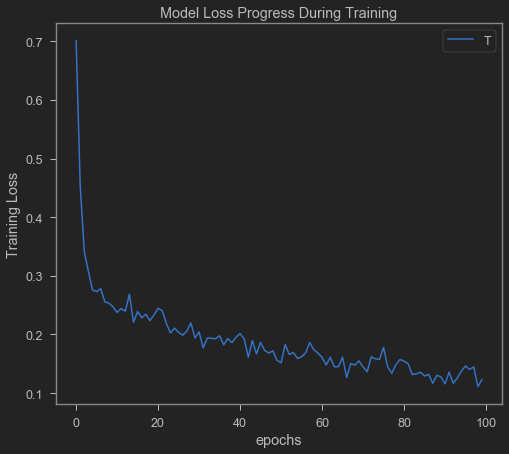

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.legend('Training Loss')

# TASK 8:
__TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS__

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
accuracy_DecisionTree=DecisionTree_model.score(X_test,Y_test)
accuracy_DecisionTree

0.6206848138928338

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
RandomForest_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train,Y_train)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
accuracy_RandomForest=RandomForest_model.score(X_test,Y_test)
accuracy_RandomForest

0.794667745917771

# TASK 9:
__CALCULATING VARIOUS REGRESSION KPIs__


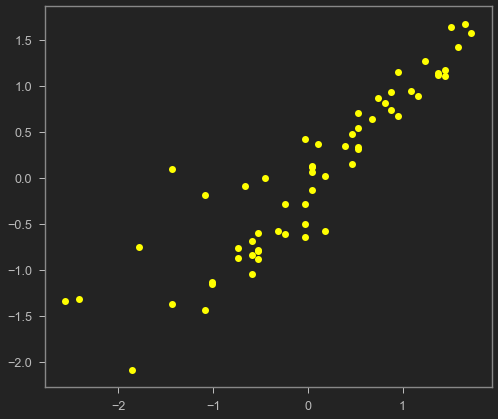

In [49]:
Y_predict=LinearRegression_model.predict(X_test)
plt.plot(Y_test,Y_predict,'o',color="yellow")

In [50]:
Y_predict_orig=scaler_y.inverse_transform(Y_predict)
Y_test_orig=scaler_y.inverse_transform(Y_test)

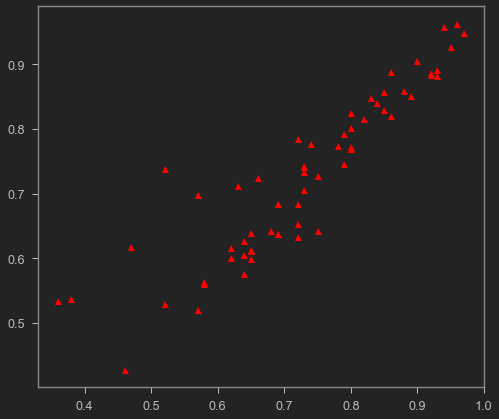

In [51]:
plt.plot(Y_test_orig,Y_predict_orig,'^',color='red')

In [52]:
k=X_test.shape[1]
n=len(X_test)
n

60

In [53]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [57]:
RMSE=float(format(mean_squared_error(Y_test_orig,Y_predict_orig),'3f'))
MSE=mean_squared_error(Y_test_orig,Y_predict_orig)
MAE=mean_absolute_error(Y_test_orig,Y_predict_orig)
r2=r2_score(Y_test_orig,Y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

In [58]:
print("RMSE:",RMSE,"\nMSE:",MSE,"\nMAE",MAE,"\nR2:",r2,"\nAdjusted R2",adj_r2)

RMSE: 0.003676 
MSE: 0.003676120353011487 
MAE 0.041416000092531165 
R2: 0.82134423115248 
Adjusted R2 0.7972944161153138


# THANK YOU !